In [2]:
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Loading dataset and counting number of dishes and users to feed into NN :

In [3]:
final_processed_dataset=pd.read_csv(r"Final_Processed_Dataset.csv")
final_processed_dataset_initial=final_processed_dataset
number_of_users=final_processed_dataset["Name"].unique().shape[0]
number_of_dishes=final_processed_dataset["ReviewerName"].unique().shape[0]

Dropping some columns to make computation feasible :

In [4]:
final_processed_dataset=final_processed_dataset.drop(columns=['Name', 'AuthorId', 'AuthorName', 'DatePublished', 'CookTime', 'PrepTime', "ReviewerName", 'ReviewerID', 'RecipeIngredientParts', 'CholesterolContent', 'SodiumContent', 'RecipeServings', 'AggregatedRating', 'ReviewCount', 'RecipeCategory'])

In [5]:
values_to_predict=final_processed_dataset["Rating"]

Scaling the input train and test data :

In [6]:
x_train, x_test, y_train, y_test = train_test_split(final_processed_dataset, values_to_predict, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Creating model structure with 32 nodes in first hidden layer and 8 in next one. prediction layer has only 1 node representing predicted Rating for a dish per user. Activation used is Relu.

In [7]:
model = Sequential([
    Embedding(input_dim=number_of_users + number_of_dishes, output_dim=50),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(8,activation="relu"),
    Dense(1)
])

Training the NN :

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history=model.fit(x_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(x_test_scaled, y_test))

Epoch 1/5
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.8052 - mae: 0.4765 - val_loss: 0.2215 - val_mae: 0.2856
Epoch 2/5
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.1527 - mae: 0.2981 - val_loss: 0.1491 - val_mae: 0.3238
Epoch 3/5
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.1506 - mae: 0.2949 - val_loss: 0.1483 - val_mae: 0.3277
Epoch 4/5
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.1503 - mae: 0.2952 - val_loss: 0.1451 - val_mae: 0.2822
Epoch 5/5
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.1497 - mae: 0.2947 - val_loss: 0.1451 - val_mae: 0.2812


MSE loss graph :

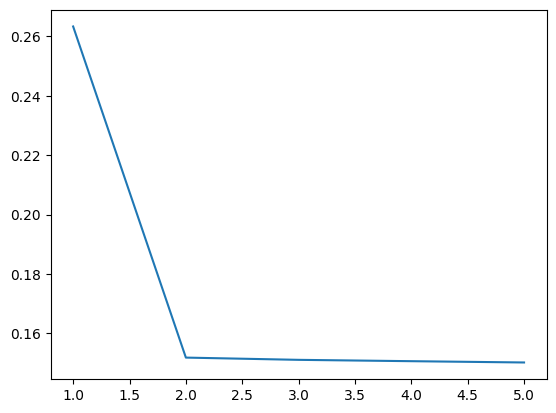

In [19]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],history.history['loss'],label="MSE Loss Graph")
plt.show()

Predicting dishes for user using userID :

In [10]:
reviewer_id=1060485       #(allyop)

final_processed_dataset_initial_temp=final_processed_dataset_initial[['RecipeId','Calories','FatContent','SaturatedFatContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','Rating',"ReviewerID"]]
final_processed_dataset_initial_temp=final_processed_dataset_initial_temp.copy()
final_processed_dataset_initial_temp['ReviewerID']=reviewer_id
final_processed_dataset_initial_temp=final_processed_dataset_initial_temp.drop_duplicates()

user_input = np.array(final_processed_dataset_initial_temp)

scaler = StandardScaler()
user_input_scaled = scaler.fit_transform(user_input)

ratings = model.predict(user_input_scaled)

top_indices = np.argsort(ratings.flatten())[::-1][:5]
top_dishes=final_processed_dataset_initial_temp.iloc[top_indices]

print(final_processed_dataset_initial[final_processed_dataset_initial["RecipeId"].isin(top_dishes["RecipeId"])]["Name"].drop_duplicates())

1042/1042 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step
5797                      Chicken Armenian
40564    Gracie Allen's Classic Roast Beef
51389                         Italian Beef
87418        Old Fashioned Oatmeal Cookies
Name: Name, dtype: object
